# UFC



<iframe width="560" height="315" src="https://www.youtube.com/embed/EaETjKmXOTo?si=uAeOYk-SXi9tKXkV" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## inleiding
In de wereld van Mixed Martial Arts (MMA) wordt succes bepaald door een combinatie van fysieke dominantie, technische vaardigheid en mentale hardheid (UFC, 2021). Vechters als Islam Makhachev, Jon Jones en Khabib hebben in recente jaren de UFC gedomineerd, niet alleen dankzij hun kracht of lengte, maar door een uitgebalanceerde beheersing van zowel strategie als mentale weerstand (Tapology, z.d.). De UFC – ’s werelds grootste MMA-organisatie – verzamelt al decennia uitgebreide statistieken over haar gevechten. Dit opent de deur voor data-gedreven analyse naar de kernvraag: wat maakt een UFC-vechter succesvol? 

 
In dit project analyseren we ruim 6.000 gevechten uit twee Kaggle-datasets, waarin zowel fysieke kenmerken als technische prestaties van vechters gedocumenteerd zijn. Net als in andere topsporten maken we een onderscheid tussen lichamelijke (niet-trainbare) eigenschappen en technisch-prestatiegerichte (trainbare) vaardigheden. 

 
Niet-trainbare kenmerken omvatten factoren zoals leeftijd, lichaamslengte en reach — eigenschappen die bij aanvang van een carrière grotendeels vastliggen. Trainbare vaardigheden daarentegen, zoals strike accuracy, takedown accuracy en submission attempts, weerspiegelen het resultaat van intensieve training en strategische keuzes. 

 
Door deze factoren afzonderlijk en in samenhang te analyseren, en de data per gevecht én per gewichtsklasse te structureren, hopen we waardevolle inzichten te bieden voor coaches, analisten en vechters. De resultaten worden gepresenteerd aan de hand van statistieken, visualisaties en reflectie per perspectief. In de onderzoek wordt alleen gekeken naar de mannelijke vechters. 

## Dataset preprocessing
De analyse focust op twee hoofdtypen variabelen: 

Lichamelijke kenmerken: dingen die relatief vaststaan, zoals leeftijd, lengte en reach 

Trainbare prestatiekenmerken: dingen die beïnvloed kunnen worden door training, zoals strike accuracy, takedown accuracy en submission attempts 

We kijken dus hoe deze eigenschappen samenhangen met de uitkomst van een gevecht (wie wint). 

Om dit mogelijk te maken combineren we twee datasets van Kaggle: 

data.csv (Rajeevw, 2019): bevat gedetailleerde statistieken per vechter en per gevecht (zoals lengte, strike accuracy, etc.) 

ufc-master.csv (Mdabbert, 2021): bevat aanvullende informatie, zoals namen, odds en achtergrondgegevens van vechters 

Omdat geen van deze datasets volledig is, is het combineren ervan essentieel om een vollediger beeld te krijgen. 

Vorm 

1 – Inladen van de datasets 

De twee CSV-bestanden worden ingelezen als aparte pandas DataFrames (df1 en df2). 
```sh 

df1 = pd.read_csv("data.csv") 

df2 = pd.read_csv("ufc-master.csv") 
```
Deze twee DataFrames vormen de basis van het preprocessingproces. 


2 – Harmoniseren van kolomnamen 

Om datasets te kunnen samenvoegen, moeten de kolommen die je gebruikt om te koppelen dezelfde naam hebben. 

In data.csv heten de kolommen met vechtersnamen: R_fighter en B_fighter 

In ufc-master.csv heten ze: RedFighter en BlueFighter 

Daarom hernoemen we de kolommen in df2: 
```sh

df2 = df2.rename(columns={ 

    'RedFighter': 'R_fighter', 

    'BlueFighter': 'B_fighter' 

}) 
```
Zo hebben beide datasets dezelfde naamgeving voor de vechters, wat noodzakelijk is voor de merge in de volgende stap. 


3 – Combineren van de datasets 

We combineren beide datasets op de kolommen R_fighter en B_fighter met een inner join. 

Hierdoor blijven alleen de gevechten over die in beide datasets voorkomen, waardoor we meer complete gegevens per gevecht hebben. 
```sh

df_merged = pd.merge(df1, df2, on=['R_fighter', 'B_fighter'], how='inner') 
```
De datumkolom wordt genegeerd omdat die vaak ontbreekt of inconsistent is, en we analyseren vooral de eigenschappen van vechters – niet het tijdstip van het gevecht. 



4 – Selecteren van relevante kolommen 

We selecteren alleen de kolommen die relevant zijn voor jouw analyse: 

Perspectief 1 – Lichamelijke kenmerken: 

Leeftijd (R_age, B_age) 

Lengte (R_Height_cms, B_Height_cms) 

Reach (R_Reach_cms, B_Reach_cms) 

Perspectief 2 – Trainbare eigenschappen: 

Strike accuracy (R_avg_SIG_STR_pct, B_avg_SIG_STR_pct) 

Takedown accuracy (R_avg_TD_pct, B_avg_TD_pct) 

Submission attempts (R_avg_SUB_ATT, B_avg_SUB_ATT) 

Daarnaast nemen we: 

weight_class: om te kunnen groeperen of filteren per gewichtsklasse 

Winner_x: de winnaar van het gevecht (uit df1) 
```sh

relevant_columns = [...] 

df_clean = df_merged[relevant_columns].copy() 
```

5 – Schoonmaken van de data 

Om ruis en fouten in je analyse te vermijden: 

Verwijderen we rijen met onbekende of onduidelijke waarden zoals "Unknown", "?", "unk", enzovoort. 

Verwijderen we rijen met lege cellen (NaN) 

Sluiten we Catchweight-gevechten uit, omdat die buiten de normale gewichtsklassen vallen 

Verwijderen we vrouwelijke gewichtsklassen (zoals WomenFlyweight), zodat je dataset alleen mannelijke gevechten bevat 

Dit zorgt ervoor dat je alleen standaard man-tegen-man gevechten in reguliere gewichtsklassen overhoudt — dat is belangrijk om eerlijke vergelijkingen te maken. 
```sh

df_clean = df_clean.replace([...], pd.NA).dropna() 

df_clean = df_clean[~df_clean['weight_class'].str.contains('Catch|Women', case=False, na=False)] 
```


6 – Toevoegen van verschilvariabelen 

We berekenen het verschil tussen de Red- en Blue-vechter voor elke variabele: 

age_diff: verschil in leeftijd (R - B) 

height_diff: verschil in lengte 

reach_diff: verschil in reach 

strike_acc_diff: verschil in strike accuracy 

td_acc_diff: verschil in takedown accuracy 

sub_att_diff: verschil in submission attempts 

Dit maakt het eenvoudiger om relaties te analyseren tussen verschillen in eigenschappen en de kans om te winnen. 
```sh

df_clean['age_diff'] = df_clean['R_age'] - df_clean['B_age'] 

```

7 – Opslaan van de opgeschoonde dataset 

De eindversie van je dataset wordt opgeslagen als een nieuwe CSV: 
```sh 

df_clean.to_csv("ufc_clean.csv", index=False) 
```
Je kunt dit bestand nu gebruiken voor verdere analyse in Python, Excel, Power BI of andere tools. 



## Data story: Het winnen van UFC wedstrijden
<a name="s1"></a>

### Perspectief 1


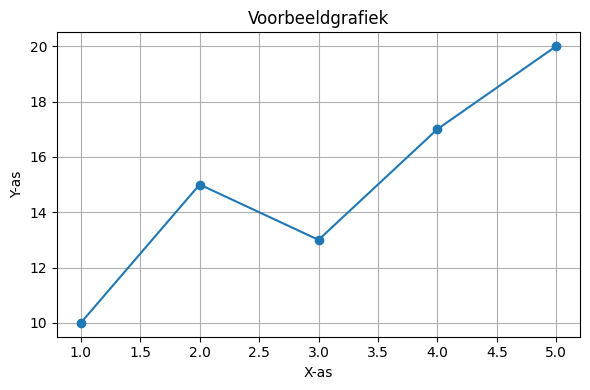

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Data
x = [1, 2, 3, 4, 5]
y = [10, 15, 13, 17, 20]

# Maak grafiek
plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='o')
plt.title("Voorbeeldgrafiek")
plt.xlabel("X-as")
plt.ylabel("Y-as")
plt.grid(True)
plt.tight_layout()
plt.show()

# Laad de opgeschoonde dataset
df = pd.read_csv("ufc_clean.csv")

# Bereken leeftijd winnaar en verliezer
df['winner_age'] = df.apply(lambda row: row['R_age'] if row['Winner'] == 'Red' else row['B_age'], axis=1)
df['loser_age'] = df.apply(lambda row: row['B_age'] if row['Winner'] == 'Red' else row['R_age'], axis=1)

# Filter op realistische leeftijden
df = df[(df['winner_age'].between(18, 50)) & (df['loser_age'].between(18, 50))]

# Maak twee datasets: één voor winnaars, één voor verliezers
winner_df = df[['weight_class', 'winner_age']].copy()
winner_df['result'] = 'Winnaar'
winner_df['age'] = winner_df['winner_age']

loser_df = df[['weight_class', 'loser_age']].copy()
loser_df['result'] = 'Verliezer'
loser_df['age'] = loser_df['loser_age']

# Combineer in één dataframe
combined_df = pd.concat([winner_df, loser_df], ignore_index=True)

# Gewichtsklassen in juiste volgorde van licht naar zwaar (alleen mannelijke klassen)
gewichtsklassen = [
    'Flyweight',
    'Bantamweight',
    'Featherweight',
    'Lightweight',
    'Welterweight',
    'Middleweight',
    'LightHeavyweight',
    'Heavyweight'
]

# Zet als categorische kolom met vaste volgorde
combined_df['result'] = pd.Categorical(combined_df['result'], categories=['Winnaar', 'Verliezer'])
combined_df['weight_class'] = pd.Categorical(combined_df['weight_class'], categories=gewichtsklassen, ordered=True)

# Interactieve boxplot
fig = px.box(combined_df,
             x='weight_class',
             y='age',
             color='result',
             title='Leeftijd van Winnaars vs Verliezers per Gewichtsklasse',
             labels={
                 'weight_class': 'Gewichtsklasse',
                 'age': 'Leeftijd',
                 'result': 'Uitkomst'
             },
             points='outliers',
             category_orders={'weight_class': gewichtsklassen, 'result': ['Winnaar', 'Verliezer']},
             color_discrete_map={'Winnaar': 'royalblue', 'Verliezer': 'indianred'})

# Stijl en layout
fig.update_traces(
    marker=dict(size=6),
    line=dict(width=1.5),
    selector=dict(type='box')
)

for trace in fig.data:
    trace.line.width = 3

fig.update_layout(
    font=dict(size=12),
    boxgap=0.2,
    bargap=0.05,
    boxgroupgap=0.05,
    paper_bgcolor='honeydew',
    plot_bgcolor='honeydew',
    xaxis_tickangle=-45,
    width=1000,
    height=600
)

fig.show()
